# SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

Ada Maris Pereira Mário - 12725432

Amanda Caroline de Oliveira Pires - 12559090

Emanuel Victor da Silva Favorato - 12558151

Gabriela dos Santos Amaral - 13749681

Gabriela Scaranello Teixeira de Barros - 9284334


##Lista 1
##Exercício 2.10 - James et al (2015).

## **Dados**

**crim:** Taxa de criminalidade per capita por cidade.

**zn:** proporção de terrenos residenciais zoneados para lotes acima de 25.000 pés quadrados.

**indus:** Proporção de acres de negócios não varejistas por cidade.

**chas:** variável fictícia do rio Charles (= 1 se o trato limita o rio; 0 caso contrário).

**nox:** concentração de óxidos de azoto (partes por 10 milhões).

**rm:** Número médio de cômodos por habitação.

**age:** proporção de unidades ocupadas pelo proprietário construídas antes de 1940.

**dis:** média ponderada das distâncias até cinco centros de emprego de Boston.
rad: índice de acessibilidade a rodovias radiais.

**rad:** índice de acessibilidade a rodovias radiais.

**tax:** Taxa de imposto sobre a propriedade do valor total por $ 10.000.

**ptratio:** proporção aluno-professor por cidade.

**b:** 1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade.

**lstat:** status inferior da população (porcentagem).

**medv:** Valor médio das casas ocupadas pelo proprietário em $ 1000s.

## **Bibliotecas e pacotes**

In [ ]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_c

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ISLP
sns.set_theme(style="whitegrid")

Carregando os dados do conjunto de dados "Boston".

In [ ]:
from ISLP import load_data
Boston = load_data('Boston')

In [ ]:
# Utilizando os dados do Kaggle

Boston = pd.read_csv('BostonHousing.csv')

In [ ]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**b)** Quantas linhas existem neste conjunto de dados? Quantas colunas? O que as linhas e colunas representam?

Linhas e colunas:

In [ ]:
Boston.shape

(506, 14)

A base de dados possui 506 linhas e 14 colunas, que representam, respectivamente, o número de dados observados e as carcterísticas deles extraídas.

**c)** Faça alguns gráficos de dispersão em pares dos preditores (colunas) neste conjunto de dados. Descreva suas descobertas.

Scatterplots das variáveis presentes na base de dados

<Figure size 2000x1000 with 0 Axes>

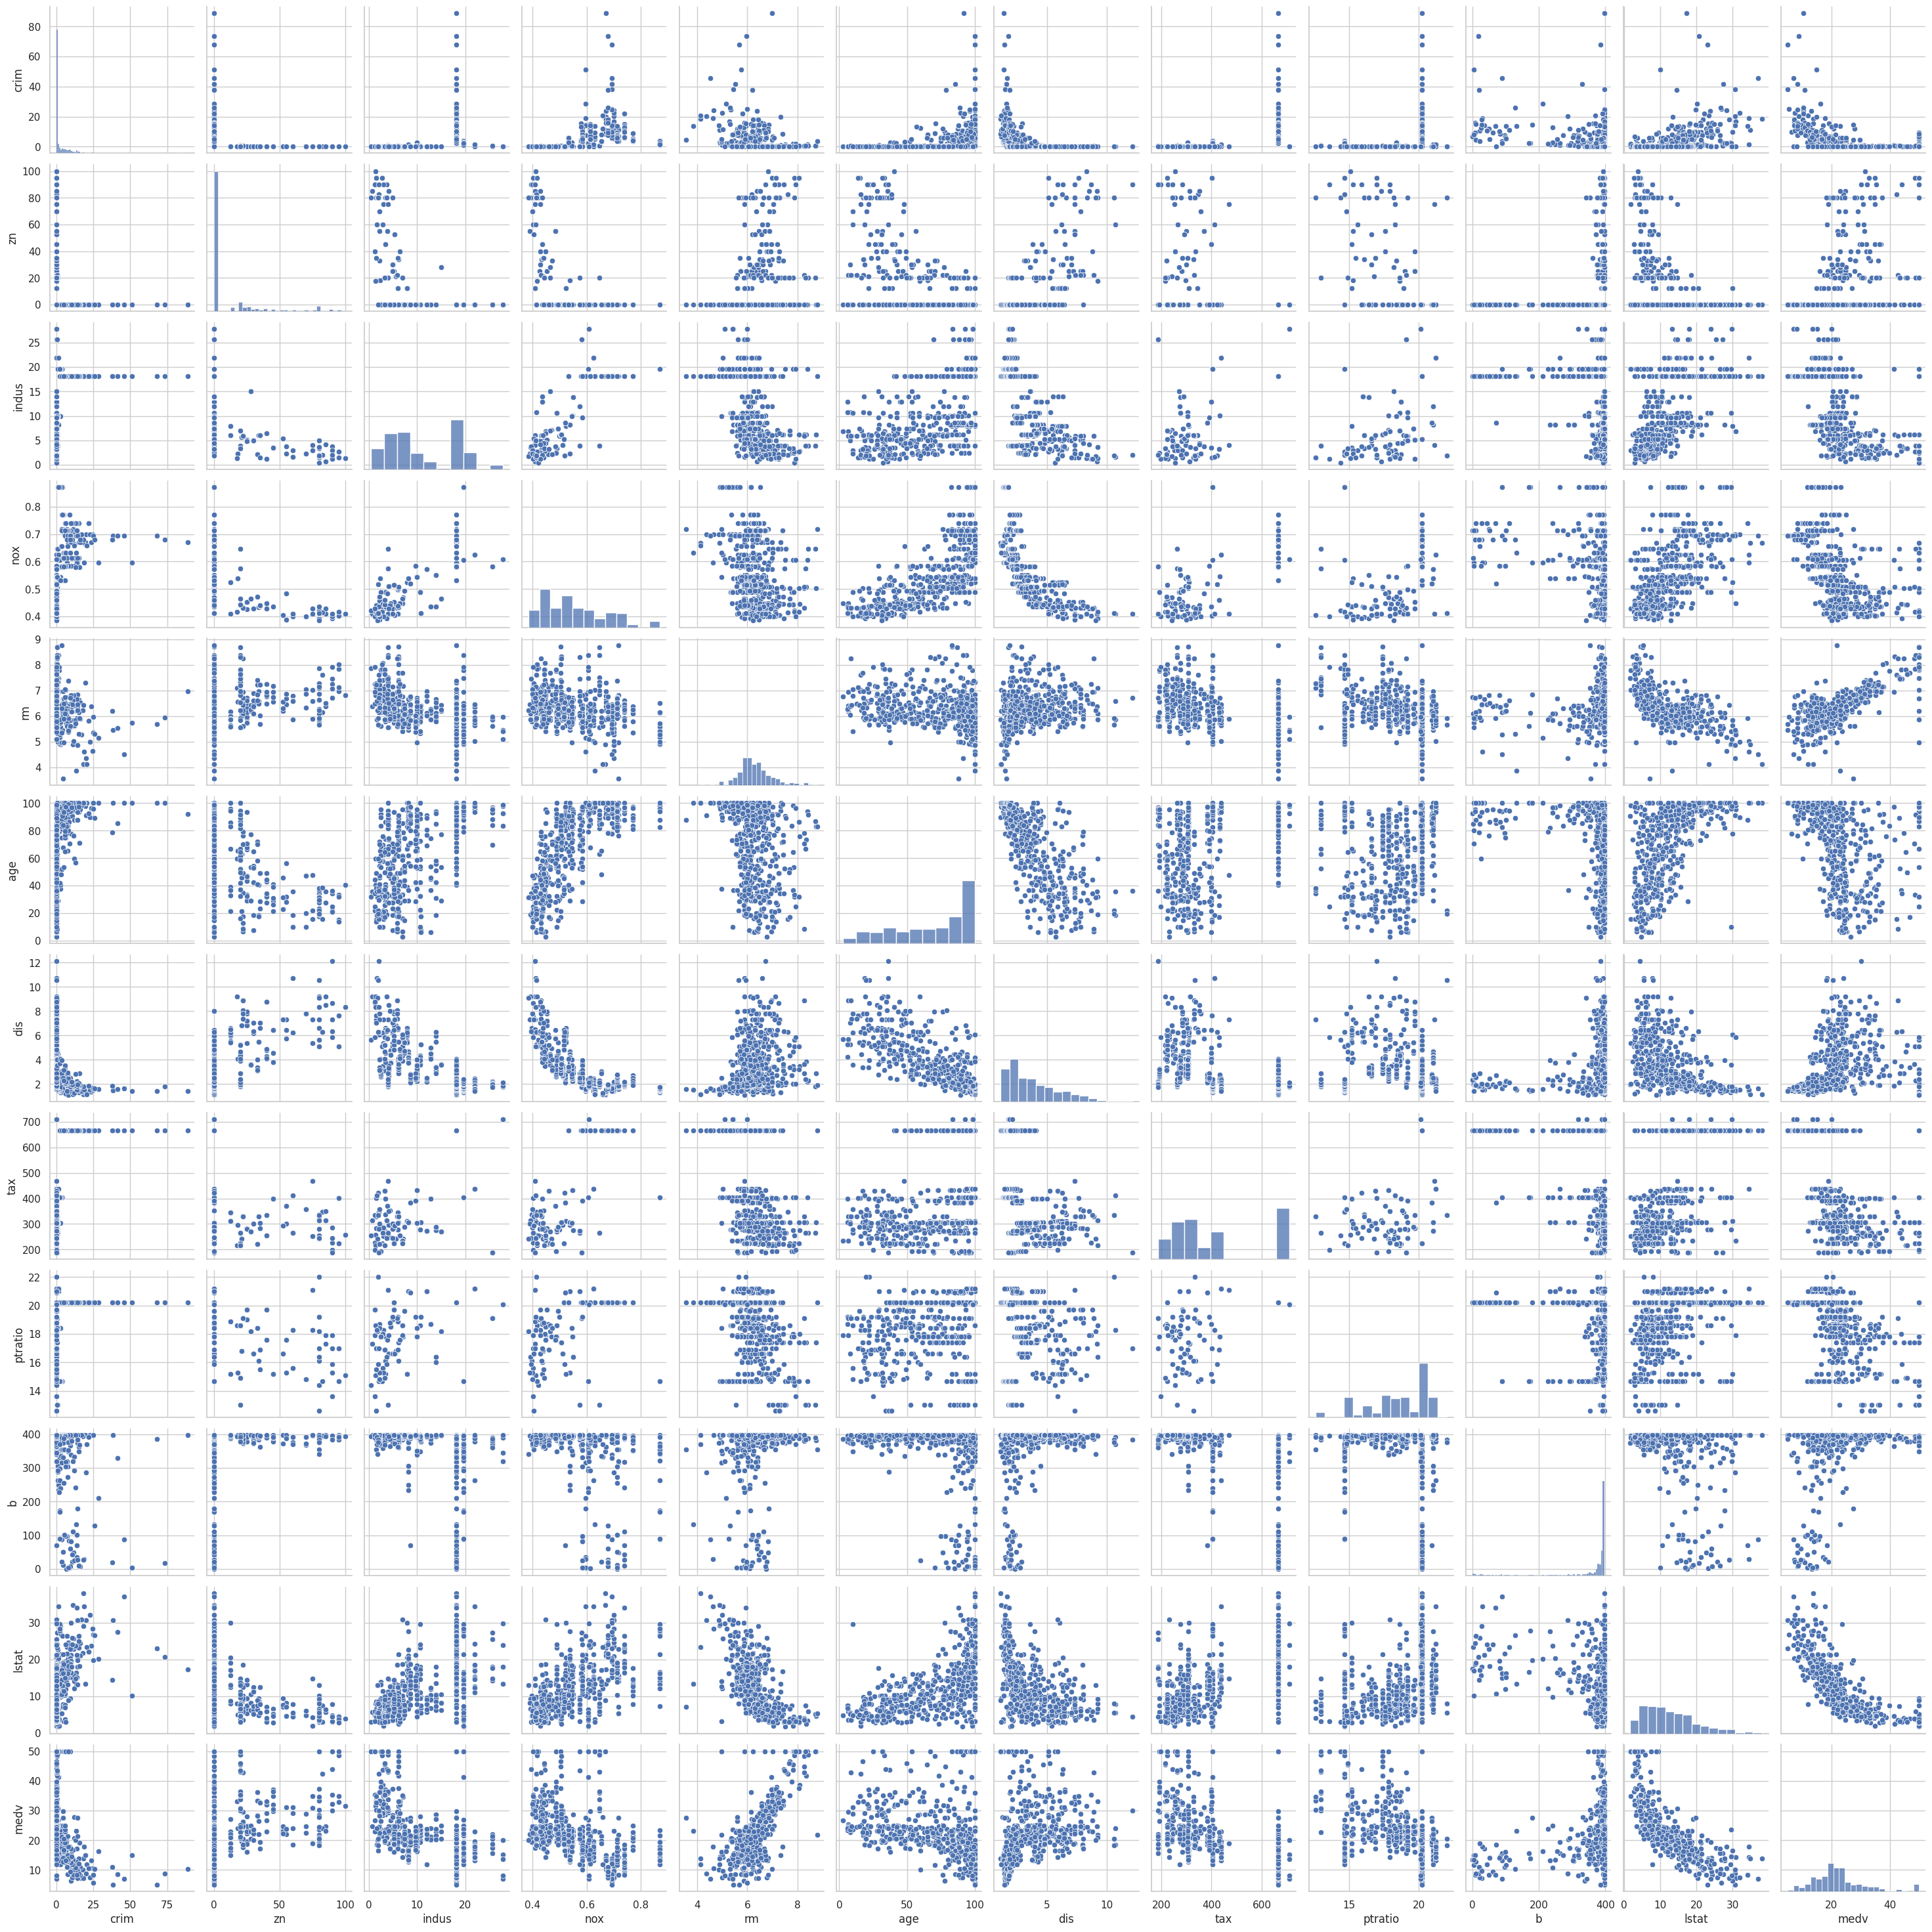

In [ ]:
# Observando os diagramas de dispersão das variáveis quantitativas

Boston1 = Boston.drop(['chas','rad'], axis = 1)

plt.figure(figsize = (20, 10))
sns.pairplot(Boston1)
plt.show()

É possível observar que algumas covariáveis apresentam clara influência sobre outras, a exemplo de lstat e rm, dis e nox, rm e medv, etc. Enquanto em outras essa relação não é nitidamente observável.

**d)** Algum dos preditores está associado à taxa de criminalidade per capita?
Em caso afirmativo, explique a relação.

Como essa relação não está muito clara pelo diagrama de dispersão tradicional, vamos observar essa relação utilizando heatmap de correlação e transformação de variáveis para a escala logaritmica:

<Axes: >

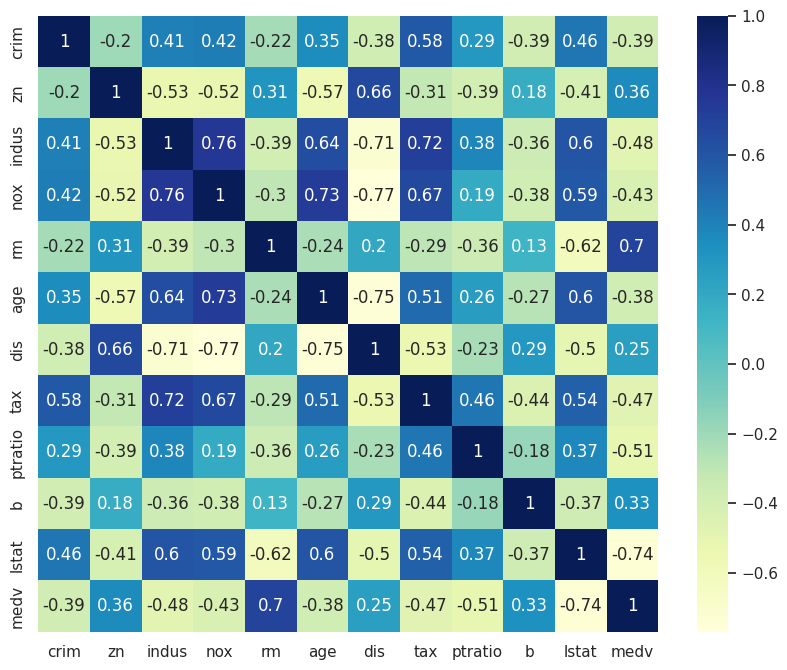

In [ ]:
# Observando o diagrama de correlação para cada variável quantitativa

plt.figure(figsize = (10, 8))
sns.heatmap(Boston1.corr(), annot = True, cmap='YlGnBu')

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


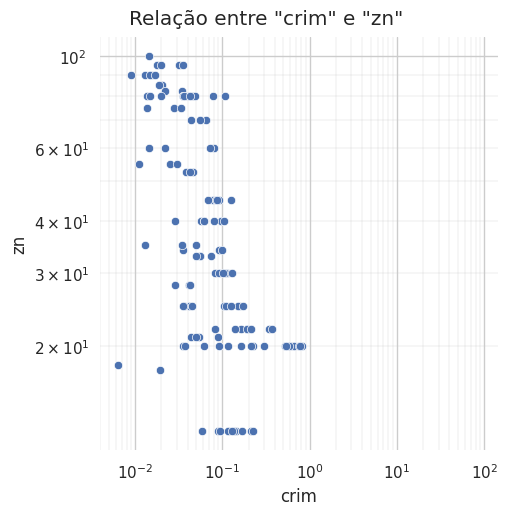

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


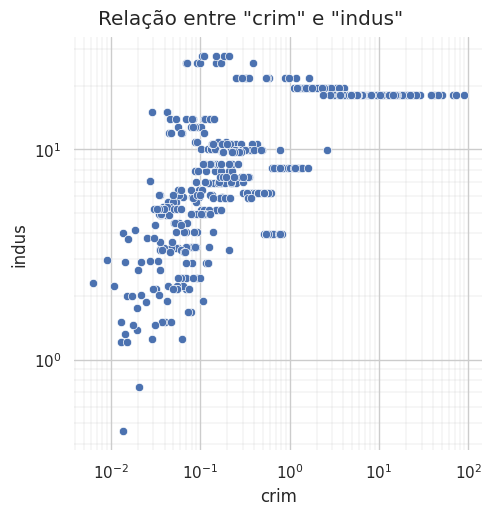

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


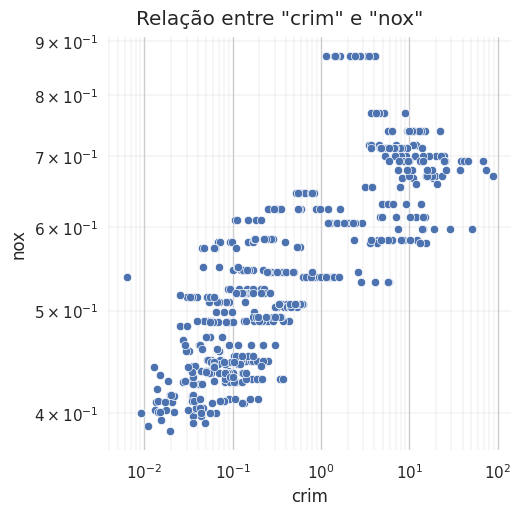

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


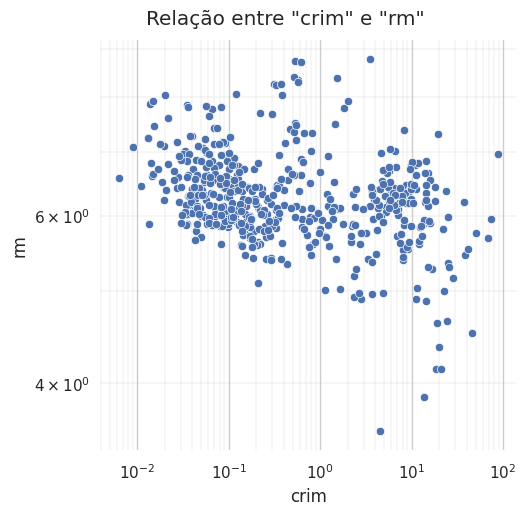

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


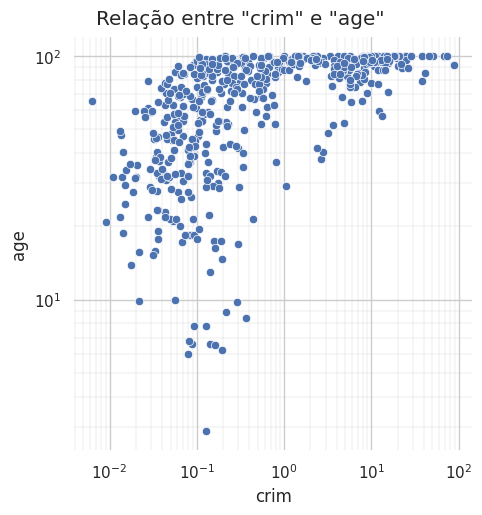

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


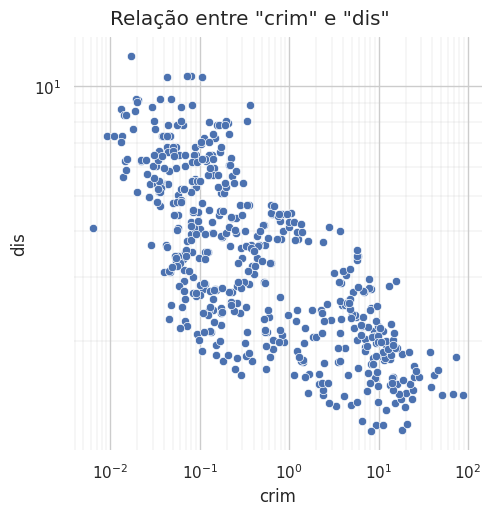

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


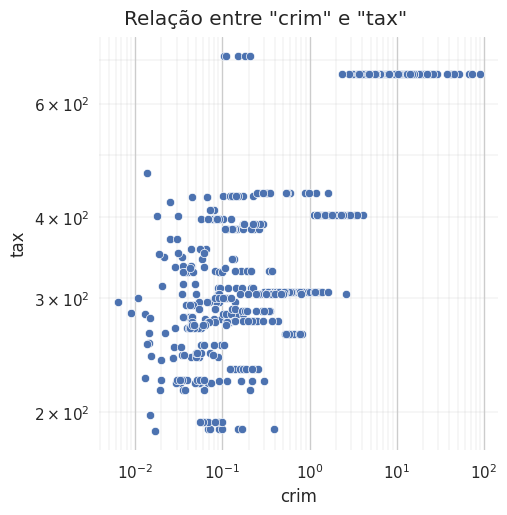

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


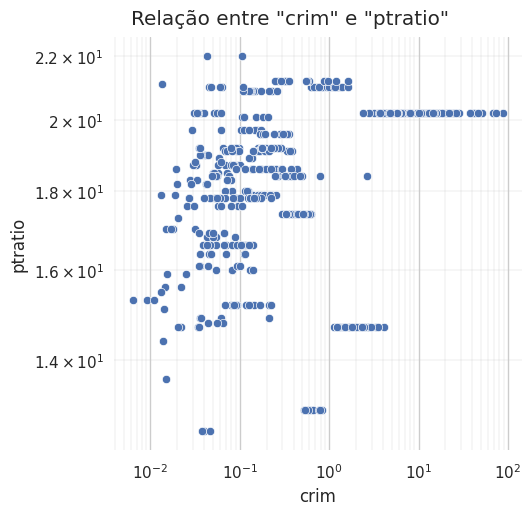

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


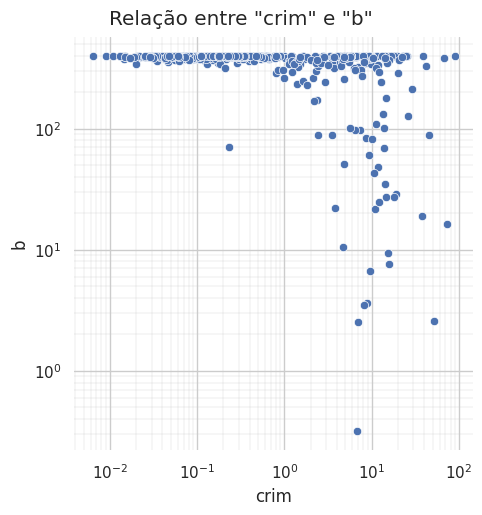

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


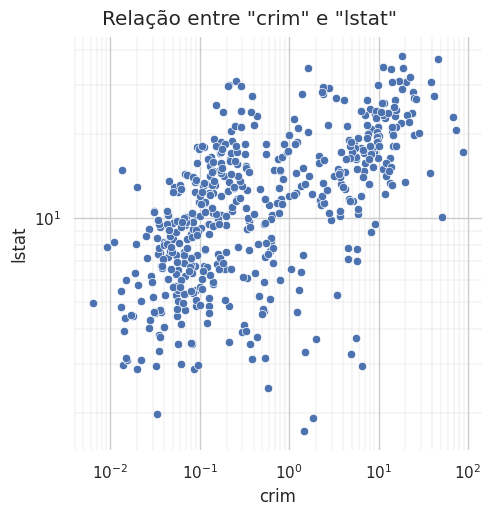

<ipython-input-10-07ec94a3186d>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


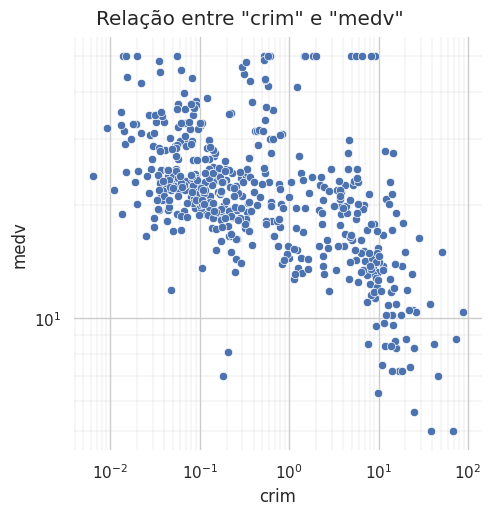

In [ ]:
variaveis_y = ['zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b', 'lstat', 'medv']

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

# Plots
for variavel_y in variaveis_y:
    g = sns.relplot(
        data=Boston,
        x="crim", y=variavel_y,
        palette=cmap, sizes=(10, 200)
    )

    g.set(xscale="log", yscale="log")
    g.ax.xaxis.grid(True, "minor", linewidth=.25)
    g.ax.yaxis.grid(True, "minor", linewidth=.25)
    g.despine(left=True, bottom=True)

    g.fig.suptitle(f'Relação entre "crim" e "{variavel_y}"', y=1.02)

    # Gráfico
    plt.show()

A partir das análises, pode-se dizer que existe uma associação entre crim e os preditores indus, nox, rm, age, dis, lstat e medv.

Para indus, nox, age e Istat parece existir uma relação positiva uma vez que aumentos no valor dessas covariáveis levam a aumentos na criminalidade per capita, já para rm, dis e medv observa-se a tendência oposta, ou seja aumentos sensíveis destas levam a diminuições nas taxas de criminalidade.

**e)** Algum dos subúrbios de Boston parece ter taxas de criminalidade particularmente altas? Taxas de impostos? Proporções aluno-professor? Comente sobre o intervalo de cada preditor

Os subúrbios e a criminalidade:

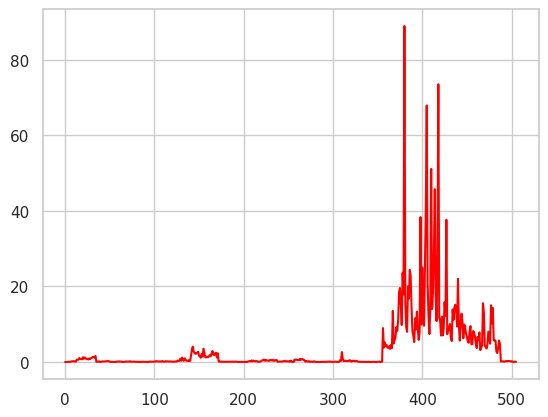

In [ ]:
plt.plot(Boston['crim'], color = 'red', label = 'CRIM')

In [ ]:
# Retirando informações da coluna de interesse
max_row = Boston.loc[Boston['crim'].idxmax()]

# Exibindo a linha com o maior valor da variável
print(max_row)

crim        88.9762
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6710
rm           6.9680
age         91.9000
dis          1.4165
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       17.2100
medv        10.4000
Name: 380, dtype: float64


Taxa de impostos por subúrbio

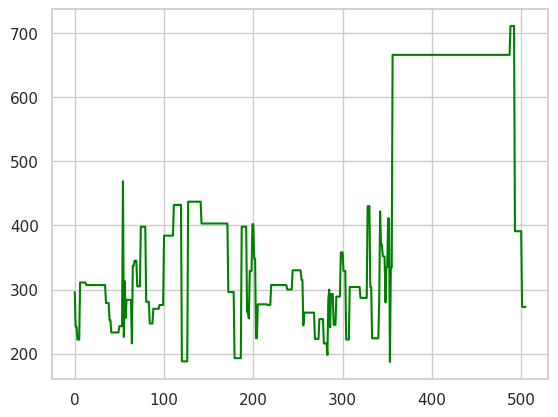

In [ ]:
plt.plot(Boston['tax'], color = 'green', label = 'tax')

In [ ]:
# Retirando informações da coluna de interesse
max_row = Boston.loc[Boston['tax'].idxmax()]

# Exibindo a linha com o maior valor da variável
print(max_row)

crim         0.15086
zn           0.00000
indus       27.74000
chas         0.00000
nox          0.60900
rm           5.45400
age         92.70000
dis          1.82090
rad          4.00000
tax        711.00000
ptratio     20.10000
b          395.09000
lstat       18.06000
medv        15.20000
Name: 488, dtype: float64


Proporção aluno-professor



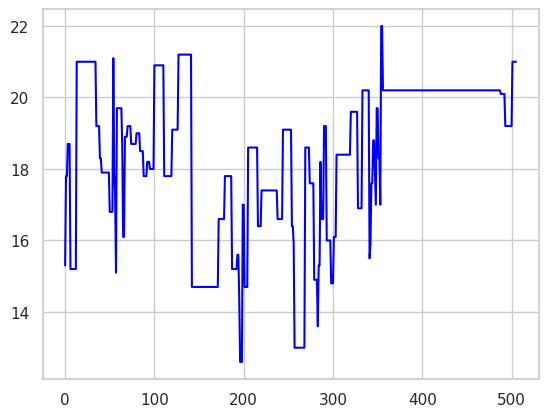

In [ ]:
plt.plot(Boston['ptratio'], color = 'blue', label = 'ptratio')

In [ ]:
# Retirando informações da coluna de interesse
max_row = Boston.loc[Boston['ptratio'].idxmax()]

# Exibindo a linha com o maior valor da variável
print(max_row)

crim         0.04301
zn          80.00000
indus        1.91000
chas         0.00000
nox          0.41300
rm           5.66300
age         21.90000
dis         10.58570
rad          4.00000
tax        334.00000
ptratio     22.00000
b          382.80000
lstat        8.05000
medv        18.20000
Name: 354, dtype: float64


Assim, temos que o subúrbio 380 tem a maior taxa de criminalidade, 488 tem a maior taxa de impostos e 354 a maior proporção aluno-professor.
Obs: levando em consideração a escala de 0 a 506.

Vamos analizar se existem irregularidades no padrão de distribuição desses dados.

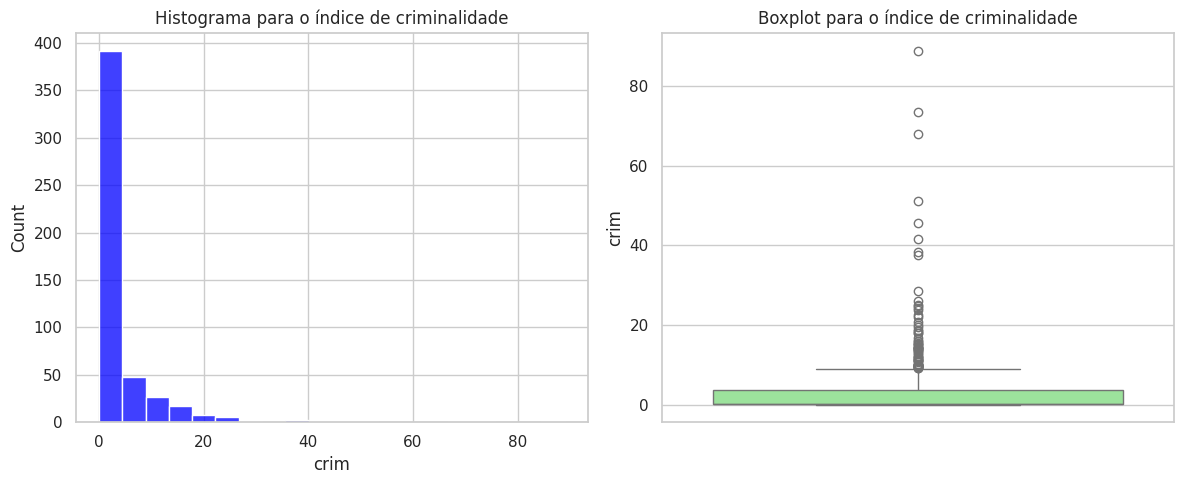

In [ ]:
# Plotando o histograma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot 1: histograma
sns.histplot(Boston['crim'], kde=False, bins=20, color='blue')
plt.title('Histograma para o índice de criminalidade')

# Plotando o boxplot
plt.subplot(1, 2, 2)  # Subplot 2: boxplot
sns.boxplot(y=Boston['crim'], color='lightgreen')
plt.title('Boxplot para o índice de criminalidade')

# Mostrando os gráficos
plt.tight_layout()
plt.show()

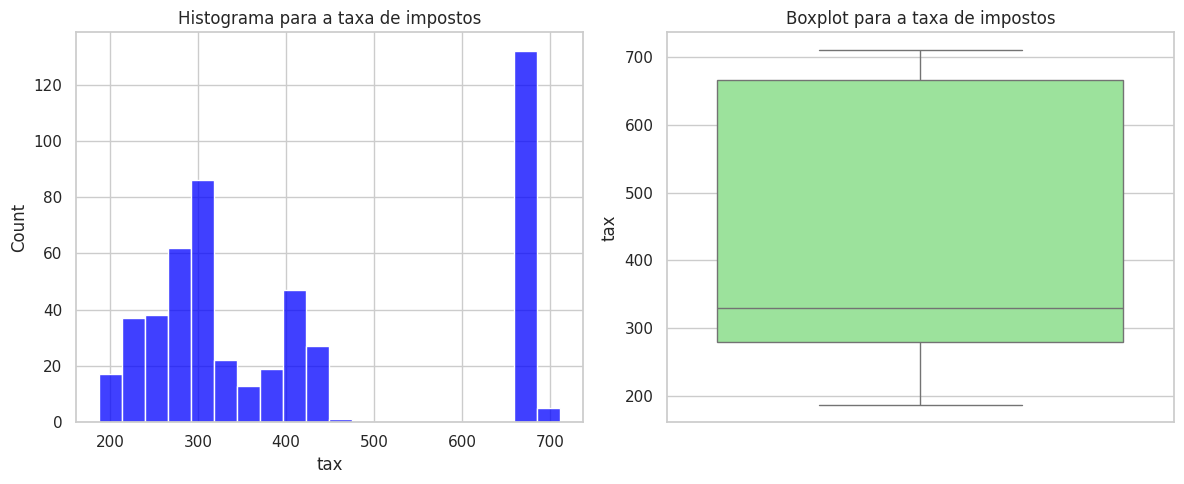

In [ ]:
# Plotando o histograma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot 1: histograma
sns.histplot(Boston['tax'], kde=False, bins=20, color='blue')
plt.title('Histograma para a taxa de impostos')

# Plotando o boxplot
plt.subplot(1, 2, 2)  # Subplot 2: boxplot
sns.boxplot(y=Boston['tax'], color='lightgreen')
plt.title('Boxplot para a taxa de impostos')

# Mostrando os gráficos
plt.tight_layout()
plt.show()

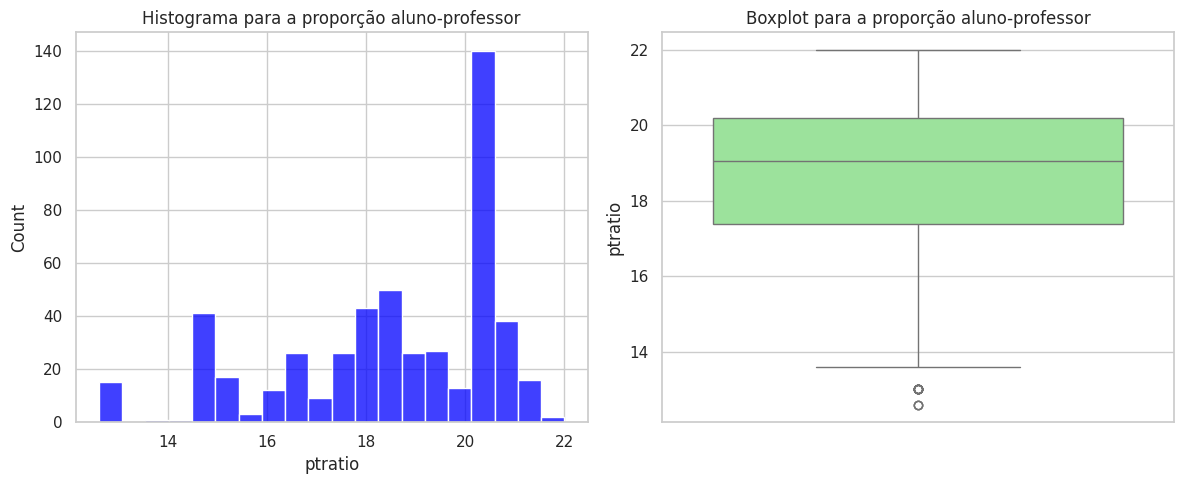

In [ ]:
# Plotando o histograma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot 1: histograma
sns.histplot(Boston['ptratio'], kde=False, bins=20, color='blue')
plt.title('Histograma para a proporção aluno-professor')

# Plotando o boxplot
plt.subplot(1, 2, 2)  # Subplot 2: boxplot
sns.boxplot(y=Boston['ptratio'], color='lightgreen')
plt.title('Boxplot para a proporção aluno-professor')

# Mostrando os gráficos
plt.tight_layout()
plt.show()

Como a análise dos histogramas e boxplots nos demonstra, temos que apenas para o índice de criminalidade temos o máximo como um valor atípico, já para taxa de impostos é possível observar que, embora discrepantes, os maiores valores não se configuram como outliars, enquanto que para a proporção aluno-professor temos que a discrepância está, sobretudo, à esquerda, onde os valores menores se encontram, sendo assim, a maior proporção aluno-professor não se configura como algo alheio ao que ocorre em outras partes da cidade.

**f)** Quantos dos subúrbios neste conjunto de dados limitam o rio Charles?



 Número de subúrbios que fazem fronteira com o rio Charles indicados por 1

In [ ]:
Boston['chas'].value_counts()

,count
chas,
0,471
1,35


É pssível observar um total de 35 subúrbios fronteiriços

**g)** Qual é a proporção mediana aluno-professor entre as cidades neste conjunto de dados?



Proporção média e mediana de alunos por professor entre as cidades:

In [ ]:
Boston['ptratio'].mean().round(2)

18.46

In [ ]:
Boston['ptratio'].median().round(2)

19.05

**h)**  Qual subúrbio de Boston tem o menor valor médio de casas ocupadas pelo proprietário? Quais são os valores dos outros preditores para esse subúrbio e como esses valores se comparam ao
intervalo geral para esses preditores? Comente suas descobertas.

In [ ]:
# Retirando informações da coluna de interesse
max_row = Boston.loc[Boston['medv'].idxmin()]

# Exibindo a linha com o maior valor da variável
print(max_row)

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


É possível observar que, neste subúrbio, os índices de criminalidade são elevados, seus limites não fazem fronteira com o rio Charles, os impostos sobre propriedades são bastante elevados, a proporção de indivíduos de classe baixa é considerável( representando cerca de 1 em cada 3 indivíduos), além de todas as casas terem uma idade avançada, tendo sido construídas antes de 1940. Tais índices sugerem se tratar de um bairro antigo e carente do município de Boston.

**i)** Nesse conjunto de dados, quantos subúrbios têm em média mais de sete cômodos por moradia? Mais
do que oito cômodos por habitação? Comente sobre os subúrbios que têm em média mais de oito quartos por moradia.

Vamos invetigar o número de subúrbios com mais de 7 e 8 cômodoss

In [ ]:
# Subúrbios com mais de 7 cômodos.

Boston[Boston['rm'] > 7].shape[0]

64

In [ ]:
# Subúrbios com mais de 8 cômodos.

Boston[Boston['rm'] > 8].shape[0]

13

In [ ]:
Boston[Boston['rm'] > 8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


In [ ]:
Boston[Boston['rm'] <= 8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,3.725431,11.343238,11.269365,0.067623,0.555575,6.229352,68.432787,3.795913,9.653689,411.383197,18.509221,355.528320,12.865758,21.984836
std,8.737632,23.359887,6.863090,0.251355,0.116801,0.626750,28.319659,2.109773,8.804571,169.804752,2.134275,92.749426,7.122124,8.547955
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.080050,0.000000,5.190000,0.000000,0.449000,5.877750,44.225000,2.084875,4.000000,280.750000,17.400000,374.702500,7.250000,16.700000
50%,0.250895,0.000000,9.900000,0.000000,0.538000,6.183500,77.500000,3.190950,5.000000,335.000000,19.100000,391.600000,11.655000,21.000000
75%,3.840055,12.500000,18.100000,0.000000,0.624000,6.576000,94.150000,5.214600,24.000000,666.000000,20.200000,396.250000,17.112500,24.800000
max,88.976200,100.000000,27.740000,1.000000,0.871000,7.929000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


É possível observar que, para os subúrbios com mais de 8 quartos por habitação, a criminalidade mediana foi mais que o dobro dos demais, indicando que estes estão mais expostos à violência.